Task 1:
This assignment is for visualization using matplotlib: data to use: url= https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv titanic = pd.read_csv(url)

In [3]:
import pandas as pd
url = "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


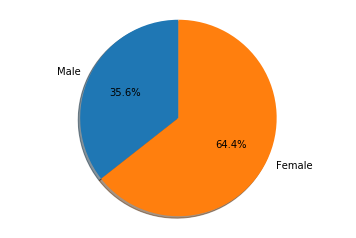

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

labels = ["Male","Female"] #Creates a list of required labels
sizes = [titanic[titanic["sex"]=='female'].count()['sex'],titanic[titanic["sex"]=='male'].count()['sex']]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90) 
ax1.axis('equal') #Draws pie in circle as given 'equal' aspect ratio
plt.show()

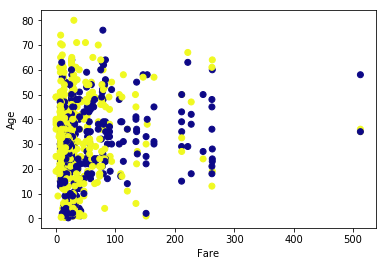

In [5]:
titanic.dropna(subset=["sex"],inplace=True) #Removes the rows of missing 'sex' column values.
plt.scatter(x='fare',y='age',c=titanic["sex"]=="male",cmap='plasma',data=titanic) #Scatterplot with plasma color map 
plt.xlabel("Fare") #Assigns x - label
plt.ylabel("Age") #Assigns y - label
plt.show()

In [30]:
import numpy as np
df = pd.DataFrame({'Airline': ['KLM(!)', ' (12)', '(British Airways. )', '12. Air France', '"Swiss Air"'],
                   'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
                   'From_To':['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm','Budapest_PaRis', 'Brussels_londOn'],
                   'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]]
                   
                  })
df

,Airline,FlightNumber,From_To,RecentDelays
0,KLM(!),10045.0,LoNDon_paris,"[23, 47]"
1,(12),NaN,MAdrid_miLAN,[]
2,(British Airways. ),10065.0,londON_StockhOlm,"[24, 43, 87]"
3,12. Air France,NaN,Budapest_PaRis,[13]
4,"""Swiss Air""",10085.0,Brussels_londOn,"[67, 32]"


In [31]:
df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int) #Makes 'FlightNumber' column values increase by 10 as stated in question and makes column an integer column
df

,Airline,FlightNumber,From_To,RecentDelays
0,KLM(!),10045,LoNDon_paris,"[23, 47]"
1,(12),10055,MAdrid_miLAN,[]
2,(British Airways. ),10065,londON_StockhOlm,"[24, 43, 87]"
3,12. Air France,10075,Budapest_PaRis,[13]
4,"""Swiss Air""",10085,Brussels_londOn,"[67, 32]"


In [32]:
df['FlightNumber'].dtype

dtype('int32')

In [33]:
temporary_df  = df["From_To"].str.split('_', expand=True) #Splits each string by '_' in 'From_To' column of the given df and assigns to temporary_df
temporary_df.columns = ['From', 'To'] #Creates two column name with 'From' and 'To'
temporary_df

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


In [34]:
temporary_df['From'] = temporary_df['From'].str.capitalize() #Capitalises 'From' column
temporary_df['To'] = temporary_df['To'].str.capitalize() #Capitalises 'To' column
temporary_df

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


In [35]:
df.drop('From_To', axis=1, inplace = True) #Deletes 'From_To' column from dataframe
df = df.join(temporary_df) #Joins temporary_df to df
df

,Airline,FlightNumber,RecentDelays,From,To
0,KLM(!),10045,"[23, 47]",London,Paris
1,(12),10055,[],Madrid,Milan
2,(British Airways. ),10065,"[24, 43, 87]",London,Stockholm
3,12. Air France,10075,[13],Budapest,Paris
4,"""Swiss Air""",10085,"[67, 32]",Brussels,London


In [36]:
delays_series = df['RecentDelays'].apply(pd.Series) 
delays_series.columns = ['delay_{}'.format(i) for i in range(1, len(delays_series.columns)+1)] #Assigns delays_series columns title
df = df.drop('RecentDelays', axis=1).join(delays_series) #Removes 'RecentDelays' column and joins with delays_series columns 
df

,Airline,FlightNumber,From,To,delay_1,delay_2,delay_3
0,KLM(!),10045,London,Paris,23.0,47.0,NaN
1,(12),10055,Madrid,Milan,NaN,NaN,NaN
2,(British Airways. ),10065,London,Stockholm,24.0,43.0,87.0
3,12. Air France,10075,Budapest,Paris,13.0,NaN,NaN
4,"""Swiss Air""",10085,Brussels,London,67.0,32.0,NaN
